<a href="https://colab.research.google.com/github/choeuneheol/python-practice/blob/master/%EB%AC%B8%EC%A0%9C%ED%95%B4%EA%B2%B0%EC%B1%85DAY7_~_8(%EC%95%88%EC%A0%84_%EC%9A%B4%EC%A0%84%EC%9E%90_%EC%98%88%EC%B8%A1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 데이터 둘러보기
import pandas as pd

#데이터 경로
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [3]:
train.shape, test.shape

((595212, 59), (892816, 58))

In [4]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [5]:
test.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,...,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,...,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,...,4,0,2,4,0,0,0,0,0,0
3,3,0,1,6,0,0,1,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,4,5,1,7,0,0,0,0,0,1,...,4,0,0,4,0,1,1,0,0,1


In [6]:
submission.head()

,id,target
0,0,0.0364
1,1,0.0364
2,2,0.0364
3,3,0.0364
4,4,0.0364


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

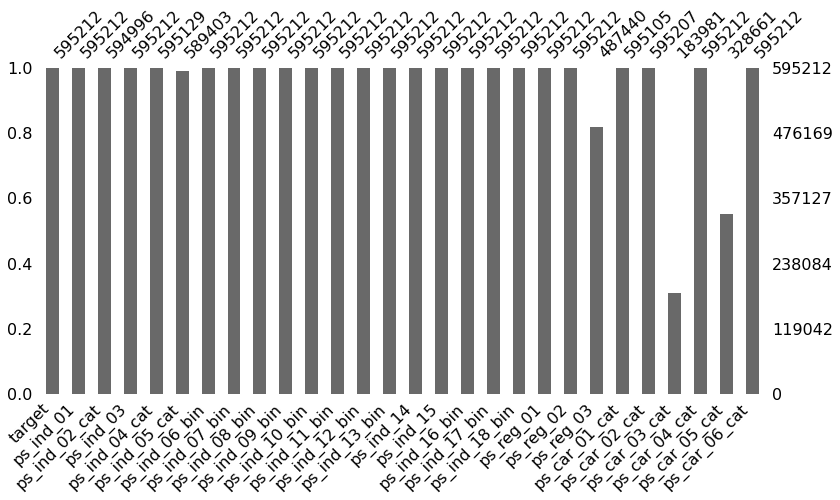

In [8]:
import numpy as np
import missingno as msno

#훈련 데이터 복사본에서 -1을 np.NaN로 변환
train_copy = train.copy().replace(-1, np.NaN)

# 결측값 시각화(처음 28개만)
msno.bar(df=train_copy.iloc[:, 1:29], figsize=(13,6))

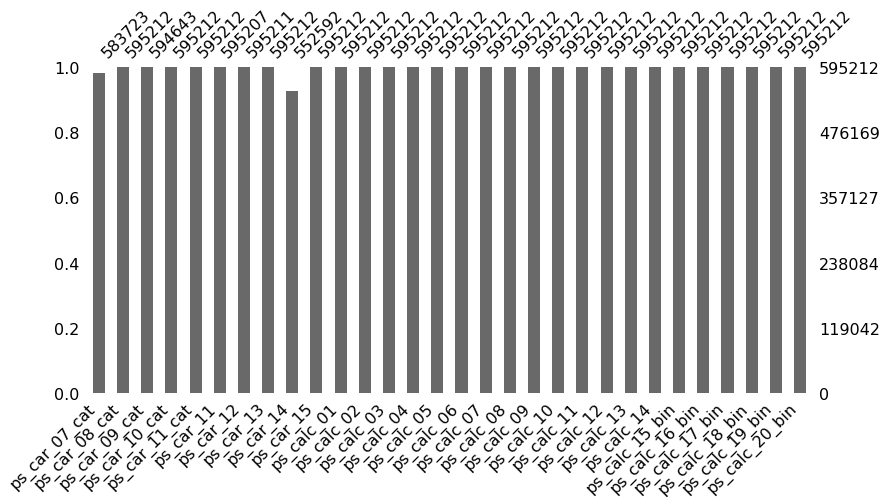

In [9]:
msno.bar(df=train_copy.iloc[:,29:], figsize=(13,6));

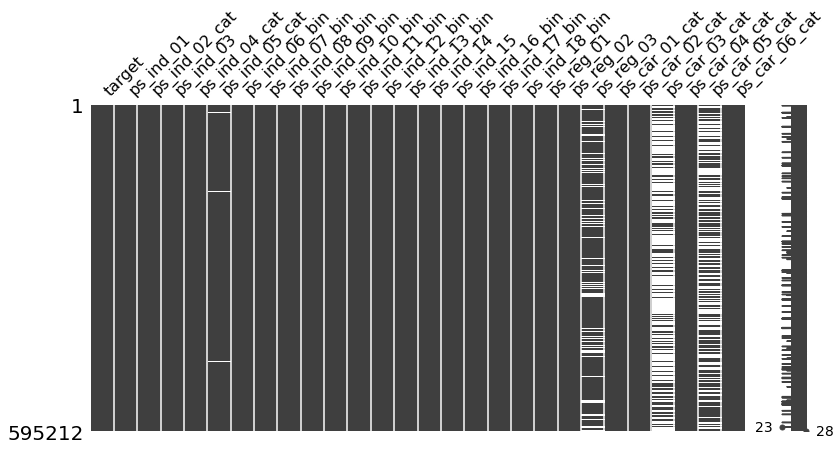

In [10]:
msno.matrix(df=train_copy.iloc[:, 1:29], figsize=(13,6));

In [11]:
def resumetable(df):
  print(f'데이터셋 형상:{df.shape}')
  summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
  summary['결측값 개수'] = (df == -1).sum().values # 피처별 -1 개수
  summary['고윳값 개수'] = df.nunique().values
  summary['데이터 종류'] = None
  for col in df.columns:
    if 'bin' in col or col == 'target':
      summary.loc[col,'데이터 종류'] = '이진형'
    elif 'cat' in col:
      summary.loc[col,'데이터 종류'] = '명목형'
    elif df[col].dtype == float:
      summary.loc[col,'데이터 종류'] = '연속형'
    elif df[col].dtype == int :
      summary.loc[col,'데이터 종류'] = '순서형'

  return summary


In [12]:
summary = resumetable(train)
summary

데이터셋 형상:(595212, 59)


,데이터 타입,결측값 개수,고윳값 개수,데이터 종류
id,int64,0,595212,순서형
target,int64,0,2,이진형
ps_ind_01,int64,0,8,순서형
ps_ind_02_cat,int64,216,5,명목형
ps_ind_03,int64,0,12,순서형
ps_ind_04_cat,int64,83,3,명목형
ps_ind_05_cat,int64,5809,8,명목형
ps_ind_06_bin,int64,0,2,이진형
ps_ind_07_bin,int64,0,2,이진형
ps_ind_08_bin,int64,0,2,이진형


In [13]:
summary[summary['데이터 종류'] == '명목형'].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object')

In [14]:
summary[summary['데이터 타입'] == 'float64'].index

Index(['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13',
       'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03'],
      dtype='object')

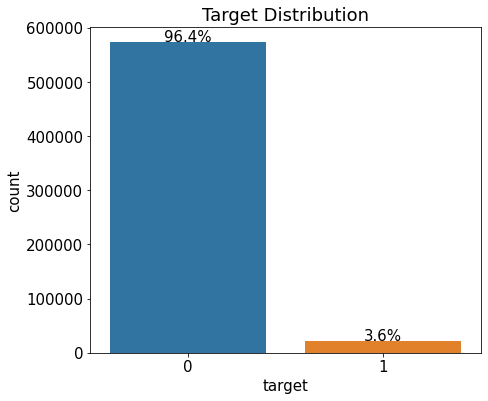

In [15]:
#데이터 시각화

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

def write_percent(ax, total_size):
  '''도형 객체를 순회하며 막대 그래프 상단에 타깃값 비율 표시'''
  for patch in ax.patches:
    height = patch.get_height()
    width = patch.get_width()
    left_coord = patch.get_x()
    percent = height/total_size*100

    #(x,y) 좌표에 텍스트 입력
    ax.text(left_coord + width/2.0,
            height + total_size*0.001,
            '{:1.1f}%'.format(percent),
            ha='center')
    
mpl.rc('font', size=15)
plt.figure(figsize=(7,6))

ax = sns.countplot(x='target', data=train)
write_percent(ax, len(train)) # 비율 표시
ax.set_title('Target Distribution');

In [16]:
#이진피처


import matplotlib.gridspec as gridspec

def plot_target_ratio_by_features(df, features, num_rows, num_cols,
                                  size=(12, 18)):
  
  mpl.rc('font',size=9)
  plt.figure(figsize=size)                        # 전체 Figure 크기 설정
  grid = gridspec.GridSpec(num_rows, num_cols)    # 서브플롯 배치
  plt.subplots_adjust(wspace=0.3, hspace=0.3)     # 서브플롯 좌우/상하 여백 설정

  for idx, feature in enumerate(features):
    ax = plt.subplot(grid[idx])
    # ax 축에 고윳값별 타깃값 1 비율을 막대 그래프로 그리기
    sns.barplot(x=feature, y='target', data=df, palette='Set2',ax=ax)


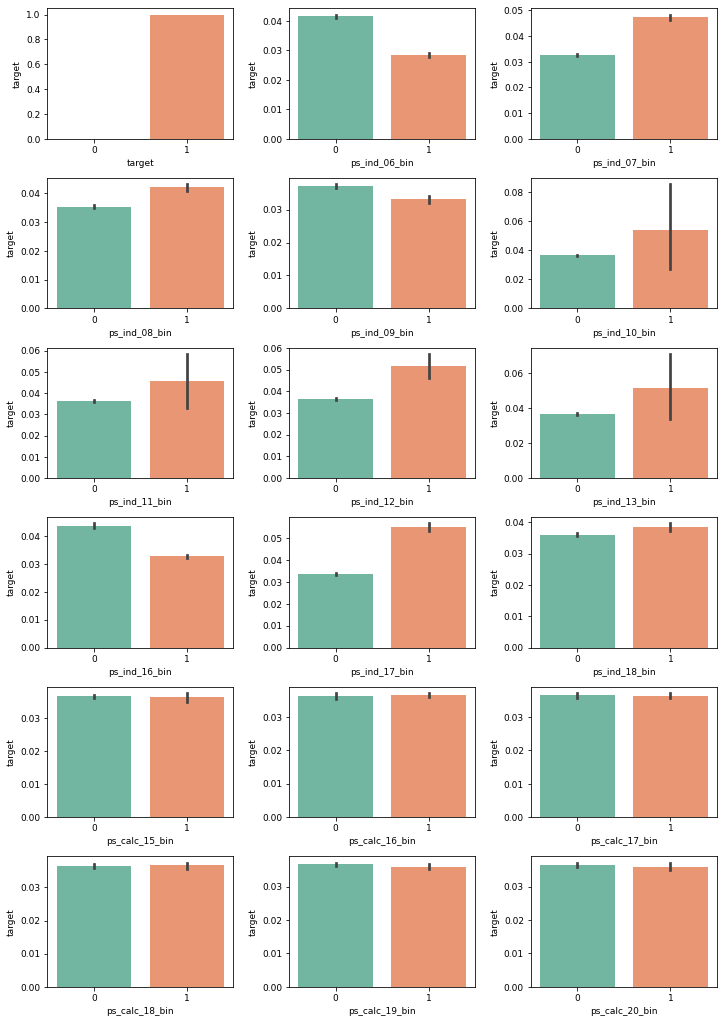

In [17]:
bin_features = summary[summary['데이터 종류'] == '이진형'].index    # 이진 피처
#이진 피처 고윳값별 타깃값 1 비율을 막대 그래프로 그리기
plot_target_ratio_by_features(train, bin_features, 6, 3)            # 6행 3열 배치

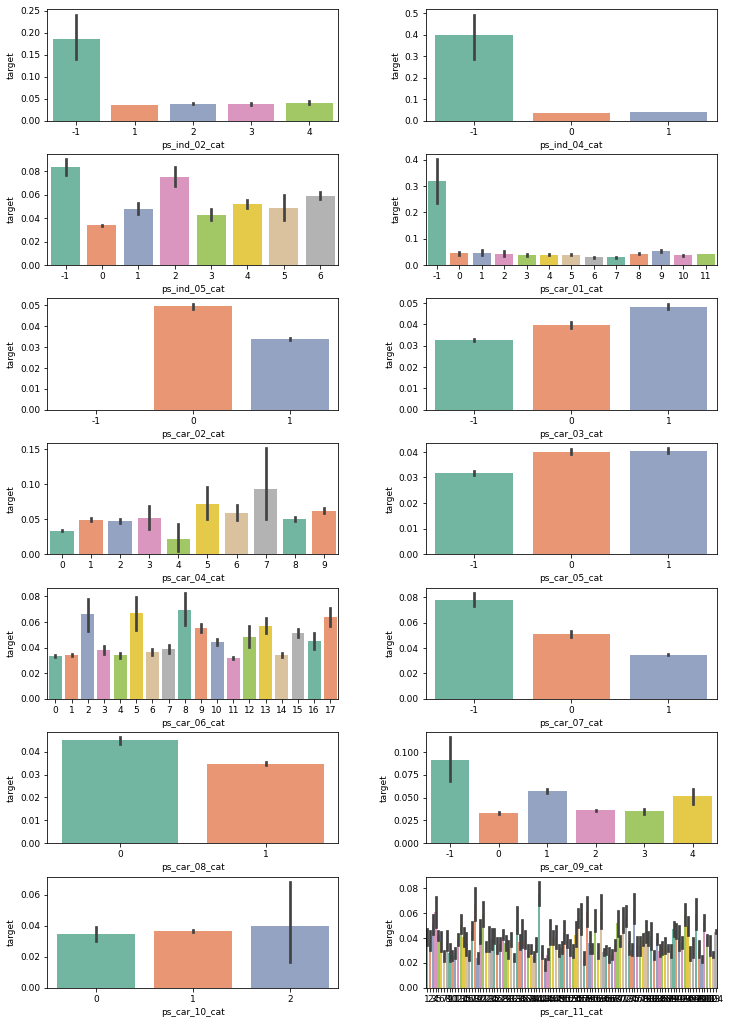

In [18]:
nom_features = summary[summary['데이터 종류'] == '명목형'].index    # 명목형 피처

plot_target_ratio_by_features(train, nom_features,7,2)               # 7행 2열

In [19]:
# #순서형 피처

# ord_features = summary[summary['데이터 종류'] == '순서형'].index    # 순서형 피처

# plot_target_ratio_by_features(train, ord_features, 8, 2, (12, 20))  # 8행 2열

In [20]:
#연속형 피처
pd.cut([1.0, 1.5, 2.1, 2.7, 3.5, 4.0],3)

[(0.997, 2.0], (0.997, 2.0], (2.0, 3.0], (2.0, 3.0], (3.0, 4.0], (3.0, 4.0]]
Categories (3, interval[float64, right]): [(0.997, 2.0] < (2.0, 3.0] < (3.0, 4.0]]

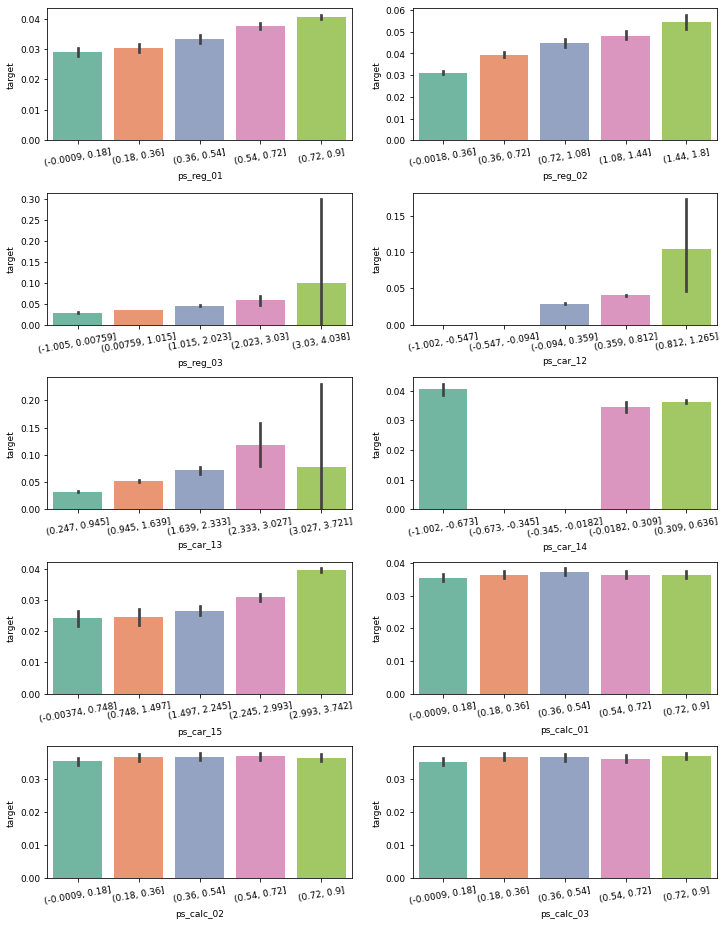

In [23]:
cont_features = summary[summary['데이터 종류'] == '연속형'].index 

plt.figure(figsize=(12,16))
grid = gridspec.GridSpec(5,2)
plt.subplots_adjust(wspace=0.2, hspace=0.4)

for idx, cont_feature in enumerate(cont_features):
  train[cont_feature] = pd.cut(train[cont_feature], 5)

  ax = plt.subplot(grid[idx])
  sns.barplot(x=cont_feature, y='target', data=train, palette='Set2', ax=ax)
  ax.tick_params(axis='x', labelrotation=10)

In [24]:
train_copy = train_copy.dropna() # np.NaN 값 삭제

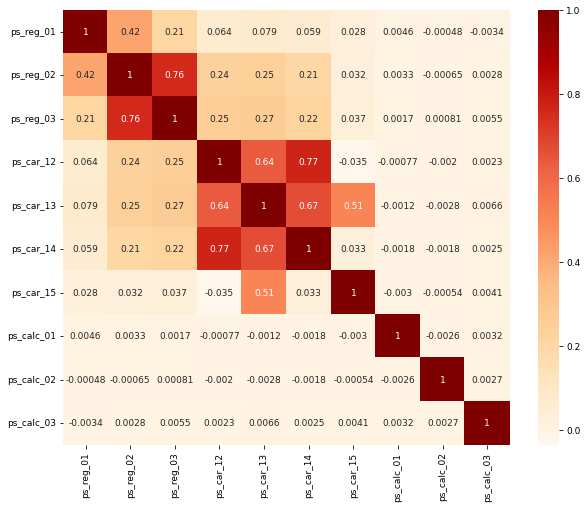

In [25]:
plt.figure(figsize=(10,8))
cont_corr = train_copy[cont_features].corr()    # 연속형 피처 간 상관관계
sns.heatmap(cont_corr, annot=True, cmap='OrRd') # 히트맵 그리기